In [199]:
from macros import *
from true_params import *
from mixtures.learn_mixture import *
from mixtures.mixture_checks import *

def array_printer(arr):
    for line in arr:
        print(str(line).replace("\n", ""))

In [200]:
import seaborn as sns
import matplotlib.pyplot as plt

In [201]:
np.set_printoptions(formatter={"float": lambda x: "{0:+0.3f}".format(x)})
%load_ext autoreload
%autoreload 1

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Run Normal Algorithm

In [4]:
s = max(lds.s for lds in LDS_LIST)
kappa = max(*[lds.kappa for lds in LDS_LIST],
            *[op_norm(lds.get_observability(2*s))/min_sv(lds.get_controllability(s)) for lds in LDS_LIST])

print(f"s={s}, kappa={kappa}")

s=2, kappa=1.414213562373095


In [5]:
lds_1_samples = generate_mixture_samples(LDS_LIST, [1, 0], s, 100000)

# Pi_M = get_Pi_M(samples, s)
# G_tilde = get_G_tilde(p, n, s, k, Pi_M)
# R = get_R(samples)
# approx_weights, markov_parameters = adjust_for_weights(G_tilde, R, s)

### Checking Pi_M

In [6]:
single_Pi_M = get_equal_weighted_Pi_M(lds_1_samples, s)

In [7]:
single_expected = get_indiv_Pi_M(LDS_LIST, s)[0]

<Axes: >

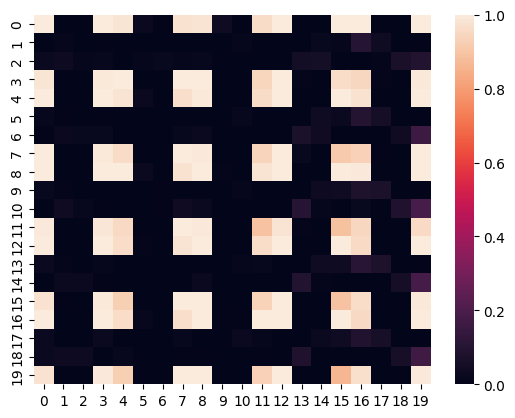

In [8]:
sns.heatmap(single_Pi_M, vmin=0, vmax=1)

<Axes: >

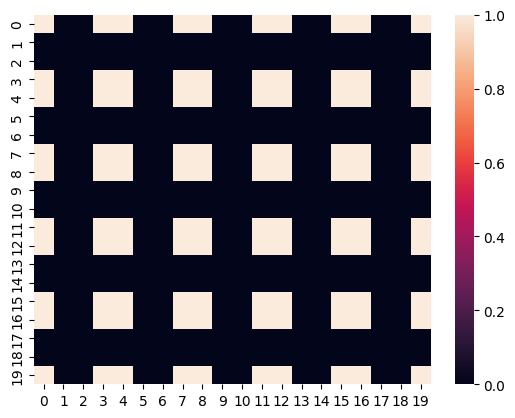

In [9]:
sns.heatmap(single_expected)

<Axes: >

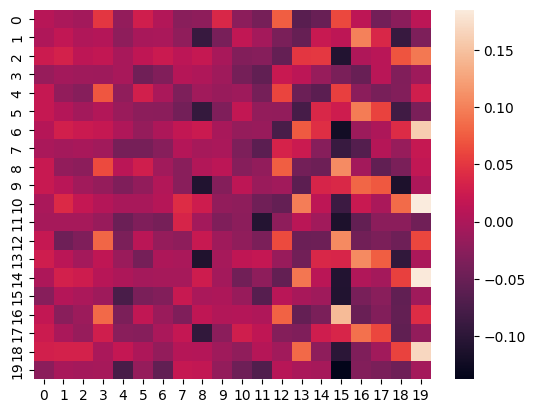

In [10]:
sns.heatmap(single_Pi_M - single_expected)

In [11]:
def get_r2(pred, goal):
    return 1-la.norm(goal - pred)**2/la.norm(goal)**2

In [12]:
get_r2(single_Pi_M, single_expected)

0.9917125319098926

### Get Pi_M for Mixtures

In [13]:
weights_1 = [0.5, 0.5]
samples_1  = generate_mixture_samples(LDS_LIST, weights_1, s, 100000)


In [14]:
weights_2 = [0.25, 0.75]
samples_2 = generate_mixture_samples(LDS_LIST, weights_2, s, 100000)

In [15]:
Pi_M_1 = get_equal_weighted_Pi_M(samples_1, s)


In [ ]:
Pi_M_2 = get_equal_weighted_Pi_M(samples_2, s)

In [16]:
expected_Pi_M_1 = get_expected_Pi_M(LDS_LIST, weights_1, s)
expected_Pi_M_2 = get_expected_Pi_M(LDS_LIST, weights_2, s)

In [17]:
get_r2(Pi_M_1, expected_Pi_M_1), get_r2(Pi_M_2, expected_Pi_M_2)

(0.9865306026530671, 0.9886014110387107)

### Generalized Eigendecomposition to Find Markov Parameters

In [59]:
expected_pre_components = extract_components(expected_Pi_M_1, expected_Pi_M_2, k)
expected_components = rescale_components(expected_pre_components, expected_Pi_M_1)
expected_components

c:\Users\nitin\Desktop\School\MEng\learning_lds\mixtures\learn_mixture.py:45: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  square_reweighting, _, _ , _ = la.lstsq([np.kron(vec, vec) for vec in components].T, Pi_M.flatten())


[array([-0.707, -0.000, +0.000, -0.707, -0.707, +0.000, +0.000, -0.707,
        -0.707, -0.000, +0.000, -0.707, -0.707, +0.000, +0.000, -0.707,
        -0.707, -0.000, +0.000, -0.707]),
 array([+0.707, +0.000, +0.000, +0.707, +0.707, +0.000, +0.000, -0.000,
        -0.000, +0.707, +0.000, -0.000, +0.707, +0.000, +0.000, -0.000,
        -0.000, +0.707, +0.000, -0.000])]

In [127]:
pre_components = extract_components(Pi_M_1, Pi_M_2, k)
components = rescale_components(pre_components, Pi_M_1)
components

c:\Users\nitin\Desktop\School\MEng\learning_lds\mixtures\learn_mixture.py:45: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  square_reweighting, _, _ , _ = la.lstsq([np.kron(vec, vec) for vec in components].T, Pi_M.flatten())


array([[-0.722, -0.001, +0.020, -0.749, -0.700, -0.003, -0.009, -0.018,
        -0.019, -0.710, -0.000, -0.023, -0.681, -0.033, -0.027, -0.021,
        +0.017, -0.741, -0.025, +0.004],
       [+0.713, +0.020, +0.012, +0.672, +0.713, -0.003, +0.013, +0.740,
        +0.717, -0.064, -0.008, +0.720, +0.722, -0.031, -0.007, +0.732,
        +0.725, -0.049, -0.008, +0.741]])

### Get Weights

In [128]:
R = get_R(samples_1, s)
R

array([+0.998, +0.015, +0.004, +1.002, +0.997, +0.007, +0.010, +0.505,
       +0.511, +0.505, +0.007, +0.503, +0.987, -0.004, +0.003, +0.511,
       +0.508, +0.505, -0.000, +0.519])

In [129]:
expected_R = get_expected_R(LDS_LIST, weights_1, s)
expected_R

array([+1.000, +0.000, +0.000, +1.000, +1.000, +0.000, +0.000, +0.500,
       +0.500, +0.500, +0.000, +0.500, +1.000, +0.000, +0.000, +0.500,
       +0.500, +0.500, +0.000, +0.500])

In [131]:
weights, components = get_weights_and_components(components, R)

c:\Users\nitin\Desktop\School\MEng\learning_lds\mixtures\learn_mixture.py:52: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  #     sqrt_weights, _, _, _ = la.lstsq(G_tilde.reshape((G_tilde.shape[0], -1)).T, R[:2*s+1].flatten())


In [132]:
weights

array([+0.533, +0.466])

In [133]:
components

array([[+0.988, +0.002, -0.028, +1.026, +0.959, +0.004, +0.013, +0.025,
        +0.026, +0.973, +0.000, +0.031, +0.933, +0.046, +0.037, +0.029,
        -0.023, +1.015, +0.035, -0.005],
       [+1.044, +0.029, +0.018, +0.984, +1.045, -0.005, +0.019, +1.084,
        +1.051, -0.094, -0.012, +1.055, +1.057, -0.046, -0.011, +1.072,
        +1.063, -0.071, -0.012, +1.086]])

We are recovering the Markov components quite well! This is enough to call the algorithm a success.

### Parameter Recovery

In [202]:
A, B, C, D = get_lds_parameters(components[0], m, n, p)

In [216]:
markov_param_estimates = [D] + [C @ mpow(A, i) @ B for i in range(10)]

<Axes: >

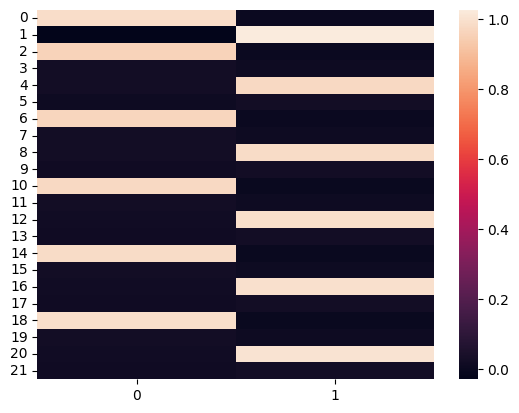

In [220]:
sns.heatmap(np.concatenate(markov_param_estimates))

We have recovered a system that looks very equivalent!

In [224]:
A, B, C, D = get_lds_parameters(components[1], m, n, p)

In [225]:
markov_param_estimates = [D] + [C @ mpow(A, i) @ B for i in range(10)]

<Axes: >

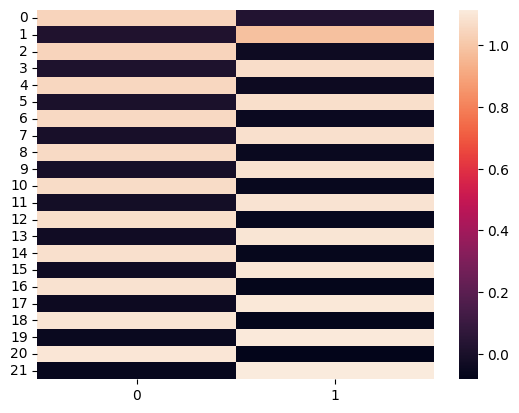

In [229]:
sns.heatmap(np.concatenate(markov_param_estimates))

Working well here too!